<span style="font-size:42px"><b>Practise Case 05 & 06</b></span><br><br>
<span style="font-size:36px">Supervised and Unsupervised Learning</span>

Copyright 2019 Gunawan Lumban Gaol

Licensed under the Apache License, Version 2.0 (the "License"); you may not use this file except in compliance with the License. You may obtain a copy of the License at http://www.apache.org/licenses/LICENSE-2.0

Unless required by applicable law or agreed to in writing, software distributed under the License is distributed on an "AS IS" BASIS, WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied. See the License for the specific language overning permissions and limitations under the License.

# Import Packages

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Import Data

In [7]:
train = pd.read_csv('csv/Practice Case 05  06 - Dataset-20191112/train.csv')
test = pd.read_csv('csv/Practice Case 05  06 - Dataset-20191112/test_with_label.csv')

In [8]:
print(train.shape)
print(test.shape)

(8000, 21)
(2000, 21)


The dataset does not require preprocessing, we can just model right away.

# Supervised Learning

Given the train.csv and test.csv, perform the following actions.
1. Create classifiers from train.csv data, in order to predict att10 as label based on the
rest of the attributes. Use at least 5 algorithms (k-NN, Decision Tree, Logistic
Regression, Voting, Averaging, Bagging, Random Forest, Averaging, Voting, AdaBoost,
XGBoost, LightGBM, CatBoost, or Stacking). Use AUC for your model evaluation
performance.
Submit your .ipynb file that contains your coding process in creating classifiers.
2. Choose the best Classifier based on highest AUC and use it for predicting the test.csv
data.
Submit your .csv file that contains the prediction of test.csv data. Sample of prediction
can be found in sample_prediction.csv file.

In [28]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc

Split the train dataset into train and valid dataset, so that we have 60 : 20 : 20 ratio for train : valid : test. The test data will only be seen after hyperparameter tuning the model on validation data.

In [29]:
X_train, X_valid, y_train, y_valid = train_test_split(train.iloc[:, :-1], train['att10'], test_size=0.25, random_state=42, stratify=train['att10'])
X_test = test.iloc[:, :-1]
y_test = test.iloc[:, -1]
print(X_train.shape)
print(X_valid.shape)
print(X_test.shape)

(6000, 20)
(2000, 20)
(2000, 20)


## Target Column Distribution

Ensure the distribution of target is even in train and valid dataset.

In [30]:
print(y_train.value_counts(normalize=True))
print(y_valid.value_counts(normalize=True))

0    0.760167
1    0.239833
Name: att10, dtype: float64
0    0.76
1    0.24
Name: att10, dtype: float64


## Modelling

Use all of k-NN, Decision Tree, Logistic Regression, Voting, Averaging, Bagging, Random Forest, Averaging, Voting, AdaBoost, XGBoost, LightGBM, CatBoost, or Stacking. Then choose the best model based on valid auc.

* Train : Valid : Test = 60 : 20 : 20
* Total NUmber of Features = 20
* Total Number of Data = 10000
* Metrics: auc

In [77]:
clf_knn = KNeighborsClassifier()
clf_dt = DecisionTreeClassifier(max_depth=5)
clf_lr = LogisticRegression(solver='lbfgs', max_iter=1000)
clf_voting = VotingClassifier([('knn', clf_knn), ('dt', clf_dt), ('lr', clf_lr)], voting='hard')
clf_averaging = VotingClassifier([('knn', clf_knn), ('dt', clf_dt), ('lr', clf_lr)], voting='soft')
clf_bagging = BaggingClassifier(clf_dt)
clf_rf = RandomForestClassifier(max_depth=10, n_estimators=100)
clf_adaboost = AdaBoostClassifier()
clf_xgb = XGBClassifier()
clf_lgb = LGBMClassifier()
clf_catboost = CatBoostClassifier(verbose=False)

In [78]:
def evaluate(estimator, X_train, X_valid, y_train, y_valid, label):
    estimator.fit(X_train, y_train)
    preds_train = estimator.predict(X_train)
    preds_valid = estimator.predict(X_valid)
    
    fpr_train, tpr_train, thresholds_train = roc_curve(y_train, preds_train)
    fpr_valid, tpr_valid, thresholds_valid = roc_curve(y_valid, preds_valid)

    roc_auc_train = auc(fpr_train, tpr_train)
    roc_auc_valid = auc(fpr_valid, tpr_valid)
    
    print(str.ljust("AUC Train/Valid {}".format(label), 50), "{:.3f}/{:.3f}".format(roc_auc_train, roc_auc_valid))

In [79]:
evaluate(clf_knn, X_train, X_valid, y_train, y_valid, 'knn')
evaluate(clf_dt, X_train, X_valid, y_train, y_valid, 'dt')
evaluate(clf_lr, X_train, X_valid, y_train, y_valid, 'lr')
evaluate(clf_voting, X_train, X_valid, y_train, y_valid, 'voting (knn, dt, lr)')
evaluate(clf_averaging, X_train, X_valid, y_train, y_valid, 'averaging (knn, dt, lr)')
evaluate(clf_bagging, X_train, X_valid, y_train, y_valid, 'bagging (dt)')
evaluate(clf_rf, X_train, X_valid, y_train, y_valid, 'random forest')
evaluate(clf_adaboost, X_train, X_valid, y_train, y_valid, 'adaboost')
evaluate(clf_xgb, X_train, X_valid, y_train, y_valid, 'xgboost')
evaluate(clf_lgb, X_train, X_valid, y_train, y_valid, 'lgboost')
evaluate(clf_catboost, X_train, X_valid, y_train, y_valid, 'catboost')

AUC Train/Valid knn                                0.943/0.933
AUC Train/Valid dt                                 0.958/0.967
AUC Train/Valid lr                                 0.643/0.645
AUC Train/Valid voting (knn, dt, lr)               0.955/0.956
AUC Train/Valid averaging (knn, dt, lr)            0.958/0.964
AUC Train/Valid bagging (dt)                       0.959/0.969
AUC Train/Valid random forest                      0.968/0.974
AUC Train/Valid adaboost                           0.944/0.964
AUC Train/Valid xgboost                            0.958/0.970
AUC Train/Valid lgboost                            0.997/0.978
AUC Train/Valid catboost                           0.990/0.976


Model already perform well, no need for further hyperparameter tuning. Top 3 model based on valid auc: lgboost, catboost, random forest. Choose lgboost to make prediction on test dataset.

In [85]:
sample_submission = pd.read_csv('csv/Practice Case 05  06 - Dataset-20191112/sample_prediction.csv')

In [90]:
sample_submission['prediction_for_class_1'] = clf_lgb.predict_proba(X_test)[:, 1]

In [92]:
sample_submission.to_csv('csv/test_prediction.csv', header=True, index=False)

# Unsupervised Learning

1. Select att1 and att2 from train.csv and test.csv data. This step will result a new data
frame or a table with size of 10,000 rows and 2 columns. Perform clustering using at
least 3 algorithms (K-Means Clustering, Hierarchical Clustering, and DBSCAN) to
cluster that new data frame.
Submit your .ipynb file that contain the process of your clustering!
2. Assume that the dataset you are working is the employee data, whether
att1 is satisfaction level (the higher the satisfaction level, the more satisfy a person
does in his employment)
att2 is evaluation result (the higher the evaluation result, the better/harder a person
works in the company).
Can you name the clusters that you have just made? 

In [81]:
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN

In [82]:
data = pd.concat([train.iloc[:, :2], test.iloc[:, :2]])

As the attribute is only 2 dimensional, we can plot the data to manually visualize the possible cluster group.

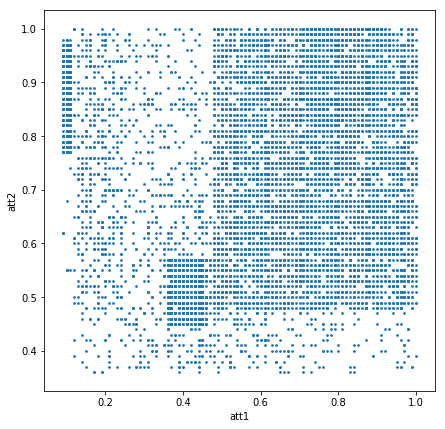

In [83]:
fig, ax = plt.subplots(figsize=(7, 7))
ax.scatter(x=data.iloc[:, 0], y=data.iloc[:, 1], s=3)
ax.set_ylabel("att2")
ax.set_xlabel("att1")
plt.show()

Looks like there is a possible of two clusters and one outliers group (very low att1 value).

## Modelling

### KMeans

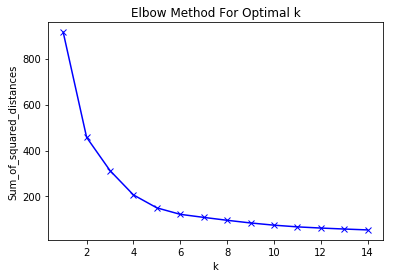

In [93]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data)
    Sum_of_squared_distances.append(km.inertia_)

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

Choose optimal number of clusters of 4.

In [127]:
km = KMeans(n_clusters=4)
km.fit(data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

### Hierarchical Clustering

In [140]:
agg = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
agg.fit(data)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=4,
                        pooling_func='deprecated')

### DBSCAN

In [141]:
dbscan = DBSCAN(eps=0.05, min_samples=100)
dbscan.fit(data)

DBSCAN(algorithm='auto', eps=0.05, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=100, n_jobs=None, p=None)

## Cluster Naming

Visualize the results of each clustering algorithms.

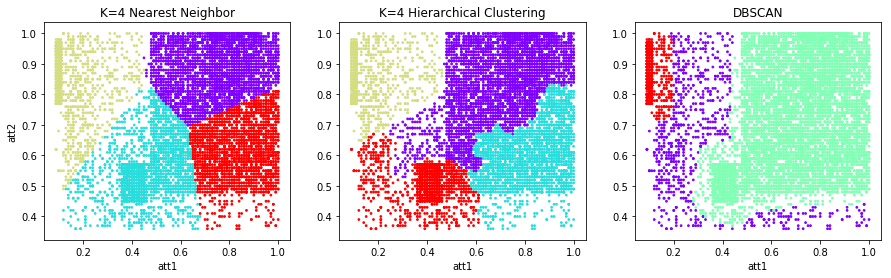

In [143]:
fig, ax = plt.subplots(1, 3, figsize=(15, 4))
ax[0].scatter(x=data.iloc[:, 0], y=data.iloc[:, 1], c=km.labels_, cmap='rainbow', s=3)
ax[0].set_xlabel("att1")
ax[0].set_ylabel("att2")
ax[0].set_title("K=4 Nearest Neighbor")
ax[1].scatter(x=data.iloc[:, 0], y=data.iloc[:, 1], c=agg.labels_, cmap='rainbow', s=3)
ax[1].set_xlabel("att1")
ax[1].set_title("K=4 Hierarchical Clustering")
ax[2].scatter(x=data.iloc[:, 0], y=data.iloc[:, 1], c=dbscan.labels_, cmap='rainbow', s=3)
ax[2].set_xlabel("att1")
ax[2].set_title("DBSCAN")
plt.show()

Considering:
* att1 is satisfaction level (the higher the satisfaction level, the more satisfy a person does in his employment)
* att2 is evaluation result (the higher the evaluation result, the better/harder a person works in the company).

We can see 3 clusters of employee:
* High satisfaction and High evaluation (Loyal and Productive Employee)
* Low satisfaction but High evaluation (Unloyal but Productive Employee)
* Others (so-so employee)